<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_Arima_%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0_%EC%A1%B0%EC%A0%95_%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA 차분 파라미터 조정

## 라이브러리 설치

In [ ]:
!pip install finance-datareader
!pip install pykrx

## colab 이용 시 한글 폰트 설정

In [ ]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 버전과 위치정보
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [ ]:
# 설치된 폰트 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔고딕 없음

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/

In [ ]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 설치확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 나눔 폰트 설치경로
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bo

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴
import matplotlib.pyplot as plt
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

Python 3.7.11
설정 폰트 글꼴: ['Malgun Gothic'], 설정 폰트 사이즈: 10.0


In [ ]:
fm._rebuild()

In [ ]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system...')

In [ ]:
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
# 커널 다시시작

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothic']


## 데이터 로드

In [ ]:
def money_sur(stock_name, start, end):

  # 라이브러리를 찾음... 한방에 나옴...
    start_date = start
    end_date = end
    sample_code = stock_name

    dataset = fdr.DataReader(sample_code, start = start_date, end = end_date )
    dataset = dataset.reset_index()
    df = stock.get_market_fundamental_by_date(fromdate=start_date, todate=end_date, ticker=sample_code)
    df = df.reset_index()
    df.columns = ['Date','BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']
    data = pd.merge(dataset, df, on='Date')

    return data

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
samsung_df = money_sur('005930', start = '20180101', end = end_date)

samsung_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,1156530,16.15,2.21,157967,1.12,28500
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,1156530,16.34,2.23,157967,1.10,28500
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,1156530,16.17,2.21,157967,1.12,28500
3,2018-01-05,51300,52120,51200,52120,189623,0.020360,1156530,16.50,2.25,157967,1.09,28500
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919,1156530,16.47,2.25,157967,1.10,28500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,75300,75600,74800,75300,10103212,0.000000,39406,19.60,1.91,3841,3.98,2994
912,2021-09-13,75200,76300,75100,76300,11397775,0.013280,39406,19.86,1.94,3841,3.92,2994
913,2021-09-14,77100,77700,76600,76600,18167057,0.003932,39406,19.94,1.94,3841,3.91,2994
914,2021-09-15,77400,77400,76400,77000,12829128,0.005222,39406,20.05,1.95,3841,3.89,2994


## ARIMA 모수 설정

In [ ]:
df1 = samsung_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,51020
1,2018-01-03,51620
2,2018-01-04,51080
3,2018-01-05,52120
4,2018-01-08,52020
...,...,...
911,2021-09-10,75300
912,2021-09-13,76300
913,2021-09-14,76600
914,2021-09-15,77000


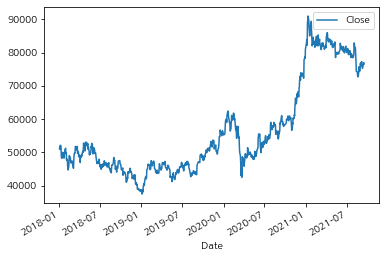

In [ ]:
df1.plot('Date','Close')

In [ ]:
df1.columns = ['Date', 'Price']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


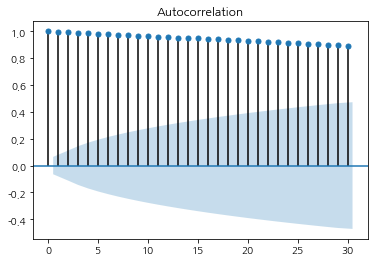

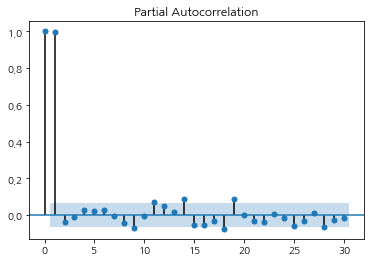

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df1.Price)
plot_pacf(df1.Price)
plt.show()

ACF를 보면 완만하지만 꾸준히 줄어드는 것으로 보인다. 또한 PACF는 1의 Time lag에서 약 0.99를 보이고 이후에 급격히 감소한다.

In [ ]:
# 시계열 정상성 검정 Augmented Dickey-Fuller Test
# 비정상성 확인

from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Price'])

print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF statistic: -0.5504781209335097
p-value: 0.8817840027444979


1차 차분 및 로그변환

In [ ]:
x = df1['Price'].values
x = np.log(x)

diff = x[1:] - x[:-1] # 차분

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


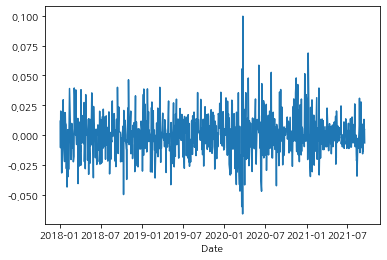

In [ ]:
sns.lineplot(df1.iloc[1:, 0], diff)

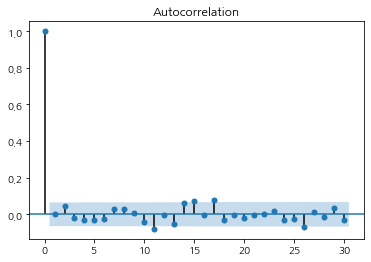

In [ ]:
fig = plot_acf(diff)

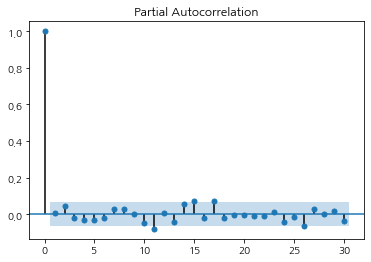

In [ ]:
fig = plot_pacf(diff)

In [ ]:
result_r = adfuller(diff)

print(f'ADF statistic: {result_r[0]}')
print(f'p-value: {result_r[1]}')  # 1차 차분만으로도 유효한 결과가 나옴

ADF statistic: -30.085939187647455
p-value: 0.0


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# 1,0,1 // 1,1,1 // 1,2,1 // 1,2,2 // 2,2,2 // .... 여러가지 차수를 지정해봤을 때 2,1,2가 최적임
# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(df1.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7563.651
Method:                       css-mle   S.D. of innovations            940.864
Date:                Thu, 16 Sep 2021   AIC                          15139.302
Time:                        02:51:13   BIC                          15168.216
Sample:                             1   HQIC                         15150.339
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2750     31.664      0.830      0.407     -35.785      88.335
ar.L1.D.y     -1.4635      0.021    -70.060      0.000      -1.504      -1.423
ar.L2.D.y     -0.9512      0.024    -38.842      0.0

In [ ]:
# const 가 유의하지 않으므로 trend를 nc로해서 다시 모델 적합
model = ARIMA(df1.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7562.703
Method:                       css-mle   S.D. of innovations            937.884
Date:                Thu, 16 Sep 2021   AIC                          15135.406
Time:                        02:51:18   BIC                          15159.501
Sample:                             1   HQIC                         15144.603
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -1.5980      0.011   -146.507      0.000      -1.619      -1.577
ar.L2.D.y     -0.9804      0.008   -116.575      0.000      -0.997      -0.964
ma.L1.D.y      1.5997      0.007    213.810      0.0

In [ ]:
# 학습, 테스트 데이터 분리
train = df1[:-10]
test = df1[-10:]

In [ ]:
model = ARIMA(train.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  905
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7481.576
Method:                       css-mle   S.D. of innovations            939.466
Date:                Thu, 16 Sep 2021   AIC                          14973.153
Time:                        05:20:21   BIC                          14997.193
Sample:                             1   HQIC                         14982.334
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -1.5979      0.011   -150.287      0.000      -1.619      -1.577
ar.L2.D.y     -0.9791      0.009   -114.157      0.000      -0.996      -0.962
ma.L1.D.y      1.6001      0.006    253.828      0.0

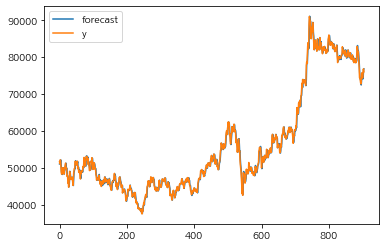

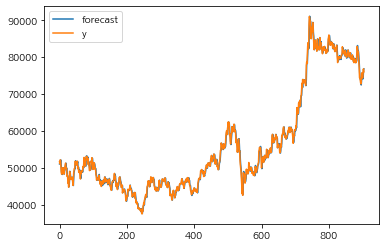

In [ ]:
model_fit.plot_predict()

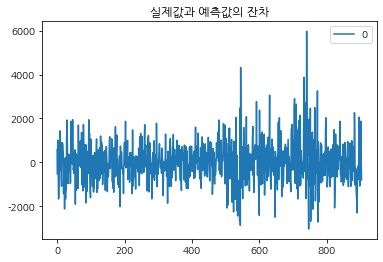

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [ ]:
fore = model_fit.forecast(steps=10) # 10일 예측
print(fore)

(array([76118.13447892, 75916.90870358, 76122.79240151, 75990.81647751,
       76000.13299935, 76114.45732424, 75922.65430604, 76117.21149139,
       75994.10910168, 76000.33564103]), array([ 939.46569342, 1330.02983147, 1638.99357786, 1884.34840208,
       2114.14555717, 2313.68662106, 2497.90948864, 2675.05132547,
       2832.28828008, 2989.8499375 ]), array([[74276.81555512, 77959.45340273],
       [73310.09813554, 78523.71927162],
       [72910.42401801, 79335.16078501],
       [72297.56147511, 79684.07147992],
       [71856.48384923, 80143.78214947],
       [71579.71487544, 80649.19977304],
       [71026.84167166, 80818.46694043],
       [70874.20723667, 81360.21574612],
       [70442.9260789 , 81545.29212446],
       [70140.33744434, 81860.33383771]]))


In [ ]:
# 마지막 10일의 예측 데이터
pred_arima_y = fore[0].tolist()

# 실제 10일의 데이터 
test_y = test.Price.values

# 신뢰구간
# 마지막 10일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in fore[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

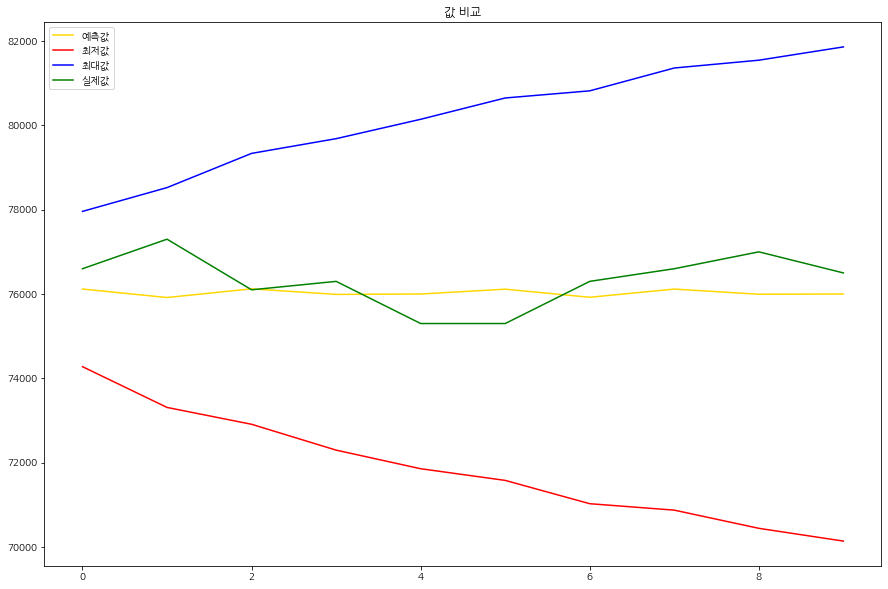

In [ ]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))
print(rmse_arima)

709.3470445626622


10일 예측이 제일 rmse가 적음
- 5일 약 1100
- 20일 약 2200